# Te Creemos (Mexico)

Energy access is multidimensional. In order to quantify and address energy demand and energy needs of the rural population, it is highly necessary to implement tools that are not limited to a purely binary assessment (household connected/not connected to the grid). Assessing energy needs shall take into account a wider range of attributes, measuring energy access in terms of affordability, reliability, quality, and safety of energy, as well as include the possibility of using modern and alternative sources (e.g., solar home systems, mini-grids).


The purpose of this pilot study was to 
* Analyze the access to energy of a sample of clients of the Mexican microfinance institution [Te Creemos](http://tecreemos.com)
* Collect a large amount of household data within few weeks
* Perform energy access assessment according to the [Multi-Tier Framework (MTF)](https://www.esmap.org/node/55526) developed by the ESMAP sector of The World Bank.

Data collection, analysis and visualization has been implemented with the [HEDERA Impact Toolkit](http://hit.hedera.online/).
Relevant information concerning the use, associated costs and several attributes describing access to electricity and cooking solutions has been collected the customers of the financial institution in rural and remote areas
using the App HEDERA collect.

The sample - and the evaluation of the energy access attributes - allows also to evaluate a baseline with respect to 
[SDG7](https://sustainabledevelopment.un.org/sdg7):
**Affordable, reliable, and safe energy for all**.
The case study is also a pioneer application of the 
[Progress out of Energy Poverty Index (PEPI)](https://depositonce.tu-berlin.de/handle/11303/6708),
which is also based on the MTF.


## Methodology

Household data can be efficiently collected using the mobile survey integrated in HEDERA collect. The survey optimizes the ESMAP Energy Survey based on the Multi-tier framework, and can be efficiently completed in less than 15 minutes. 

The HEDERA staff trained for the installation the head of the IT department of Te Creemos. 
As next, the IT department installed the required App remotely in the mobile phone of about 100loan officers 
(in 82 different offices of the instittion), and trained the users.



In [11]:
institution_id = 5

import os,sys, folium
sys.path.insert(0, os.path.normpath(os.path.join(os.path.abspath(''), '../../../HIT/src/')))
import hedera_types as hedera
import odk_interface as odk

import matplotlib.font_manager as fm
fontpath = '/Library/Fonts/JosefinSans-Regular.ttf'
fm.fontManager.addfont(fontpath)
prop = fm.FontProperties(fname=fontpath)


mfi = hedera.mfi(institution_id,setPathBook=True)
mfi.odk_data_name = '../../../ODK_Collect_Data/TeCreemos/ENCUESTA_ENERGIA_TC/ENCUESTA_ENERGIA_TC_results.csv'
data = mfi.read_survey(mfi.odk_data_name)
mfi.HH = odk.households(data)


## Collection overview

### Map
The Map allows to visualize the location of the collected GPS data. Missing data points are displayed with coordinated *(0,0)*

In [7]:
import matplotlib.pyplot as plt


plt.rcParams["font.family"] = prop.get_name()
plt.rcParams.update({'font.size': 20})
#Define initial geolocation
initial_location = [20, -99]
map_osm = folium.Map(initial_location, zoom_start=6,tiles='Stamen Terrain')
colors = {0: hedera.tier_color(0), 1 : hedera.tier_color(1), 2 : hedera.tier_color(2), 
          3 : hedera.tier_color(3), 4 : hedera.tier_color(4), 5: hedera.tier_color(5)}
mfi.HH.apply(lambda row:folium.CircleMarker(location=[row["GPS_Latitude"], row["GPS_Longitude"]],
                                        radius=10,fill_color=colors[row['E_Index']], 
                                        popup=' MTF Index: ' + str(row['E_Index'])).add_to(map_osm), axis=1)
map_osm

### Data per location
Data have been collected in more than 80 offices of the institution, covering all departments of Mexico. The following figure shows the amount of surveys in the different offices of the institution.

findfont: Font family ['TW Cen MT'] not found. Falling back to DejaVu Sans.


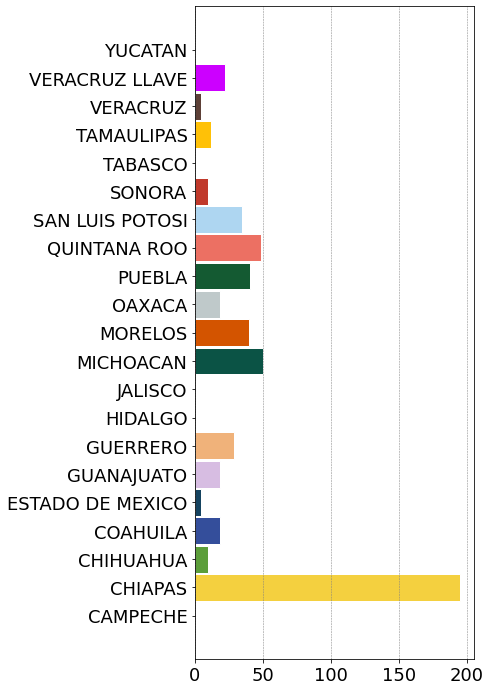

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
mfi.plot_collection_barh()


## Dates of Collection
The following figure shows the amount of surveys per day

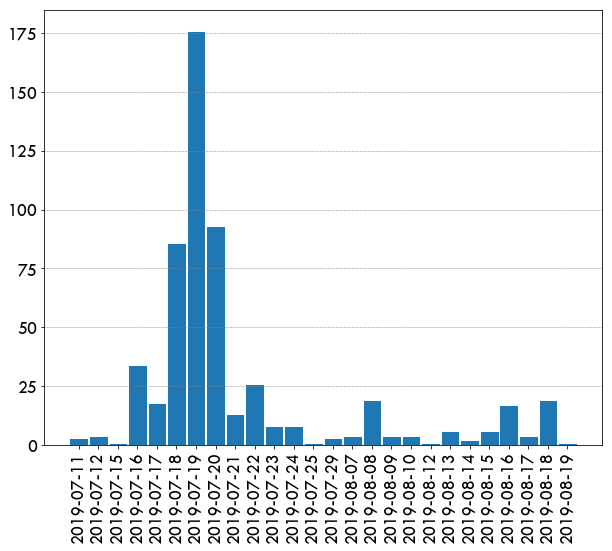

In [4]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import numpy as np

S = odk.get_survey_duration(data)
dates = np.unique(np.array(mfi.HH['date']))
ind = np.arange(len(dates))
dates_plot = []
dates_labels = []

mean_e = []
mean_c = []

for d in dates:
    
    select = mfi.HH['date']== d
    dates_plot.append( sum(select) )
    dates_labels.append(d)
    
    # get surveys data on a diven date
    surveys = S[select]    
    select = surveys['electricity']>0
    surveys = surveys[select]
    mean_e.append(surveys['electricity'].mean())
    mean_c.append(surveys['electricity'].mean())

# survey per date    
fig, ax = plt.subplots(figsize=(10,8))      
plt.bar(ind, dates_plot, width=0.95,edgecolor='white')
plt.xticks(ind, dates, rotation=90)
ax.yaxis.grid(color='grey', linestyle='--', linewidth=0.5)
plt.show()

### Average Duration
Surveys duration was on average between 3 and 15 minutes (for electricity and cooking)

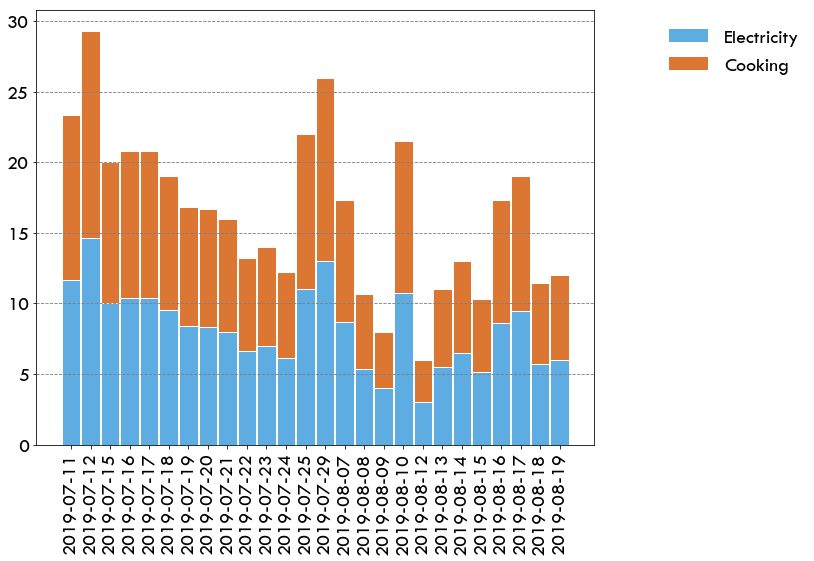

In [5]:
import matplotlib.pyplot as plt
# change plot layout
plt.rcParams["font.family"] = prop.get_name()
plt.rcParams.update({'font.size': 20})
# survey duration
fig, ax = plt.subplots(figsize=(10,8))      
plt.bar(ind, mean_e, width=0.95,edgecolor='white',color='#5DADE2',label='Electricity')
plt.bar(ind, mean_c, bottom=mean_e,width=0.95,edgecolor='white',color='#DC7633',label='Cooking')
plt.xticks(ind, dates, rotation=90)
plt.legend(framealpha=1,frameon=False,bbox_to_anchor=(1.25,1.0),
                       loc='upper center').set_draggable(True)
ax.yaxis.grid(color='grey', linestyle='--', linewidth=0.85) # vertical lines
plt.show()


## Access to Electricity

### Attributes 

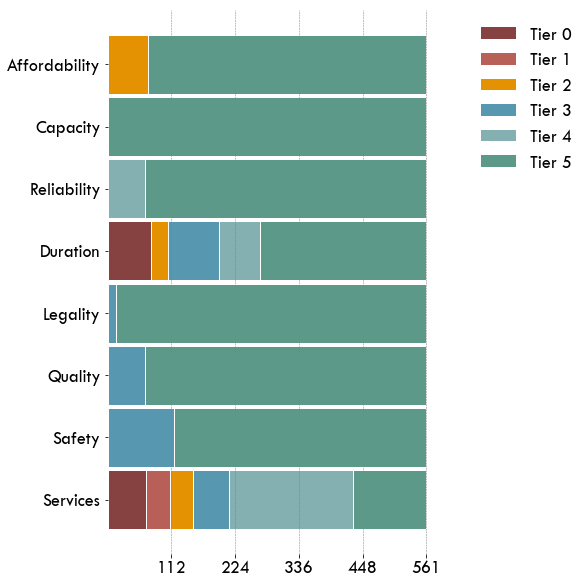

In [6]:

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
mfi.tier_barh(hedera.keys().attributes_electricity[0:8],
              hedera.names('en').e_attributes[0:8],legend=True)


### MTF Index (Access to electricity)

The MTF Index is given, for each household, by the minimum ranking among all considered attributes.

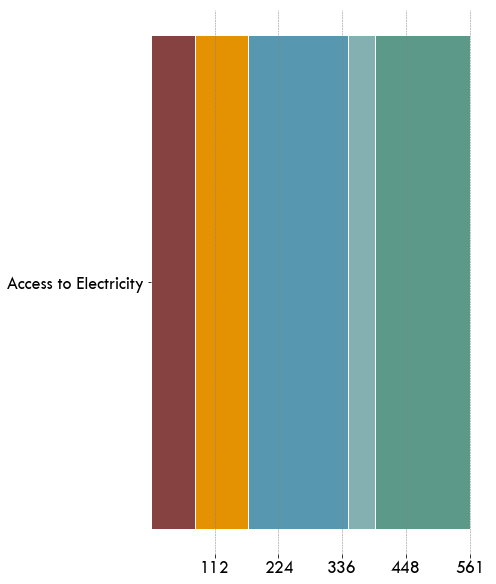

In [7]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
mfi.tier_barh(['E_Index'],['Access to Electricity'])


## Power Sources
### Primary Sources of Electricity and Illumination

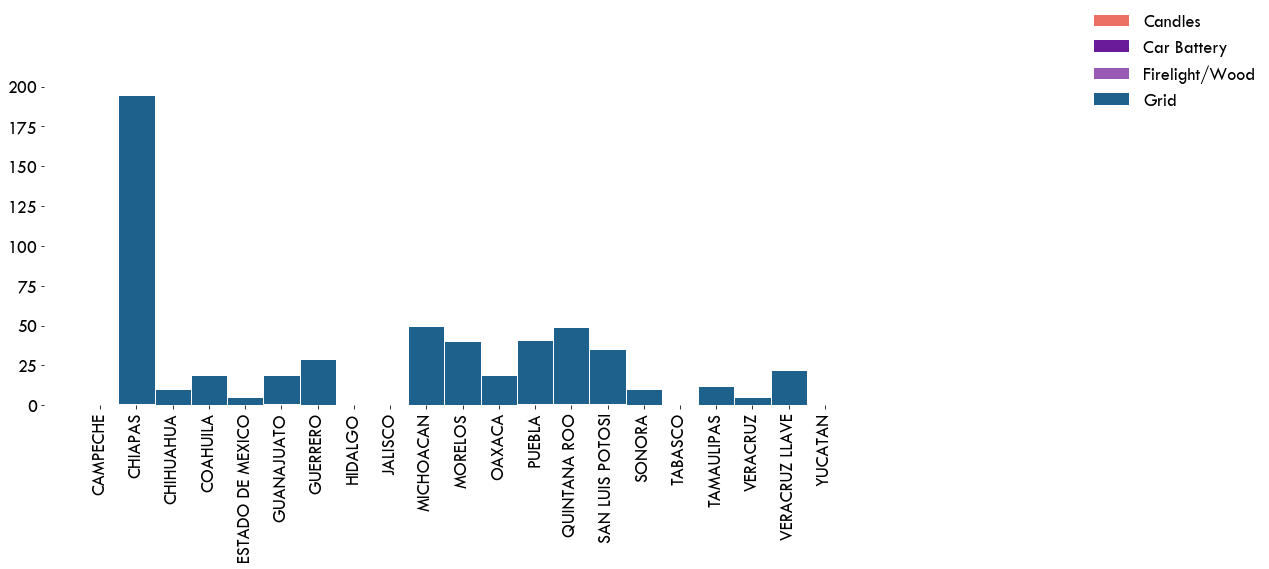

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
mfi.electricity_sources_summary(legend=True)

### Secondary Sources of Electricity and Illumination

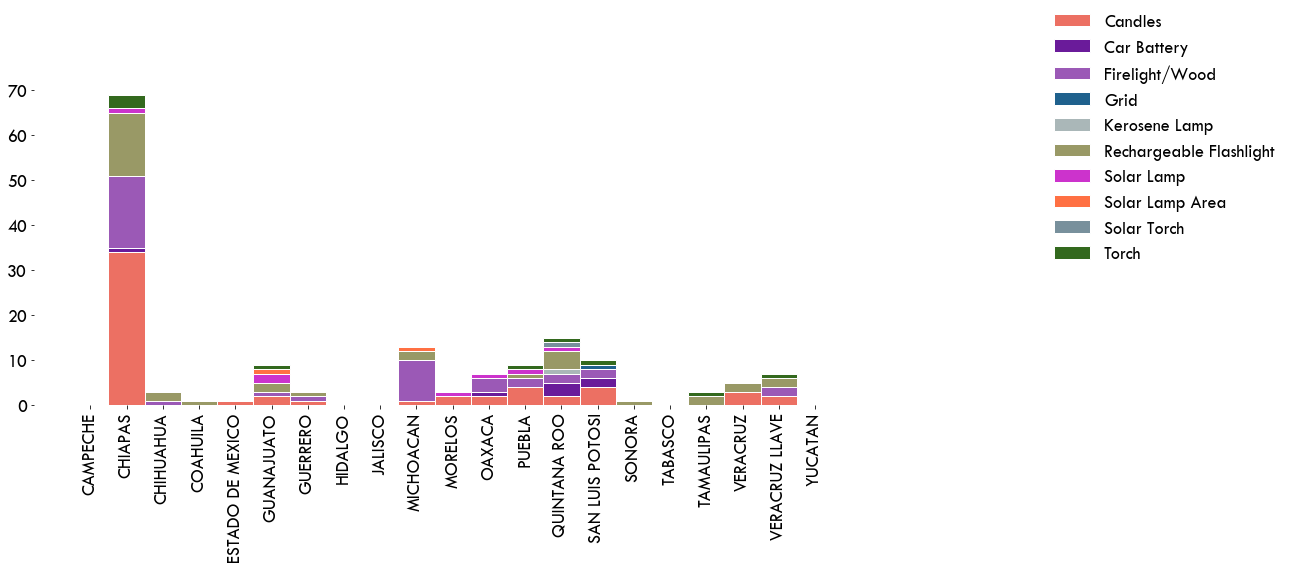

In [9]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
mfi.electricity_sources_summary(legend=True,secondary=True,primary=False)

## MTF Electricity Index vs. Primary Source

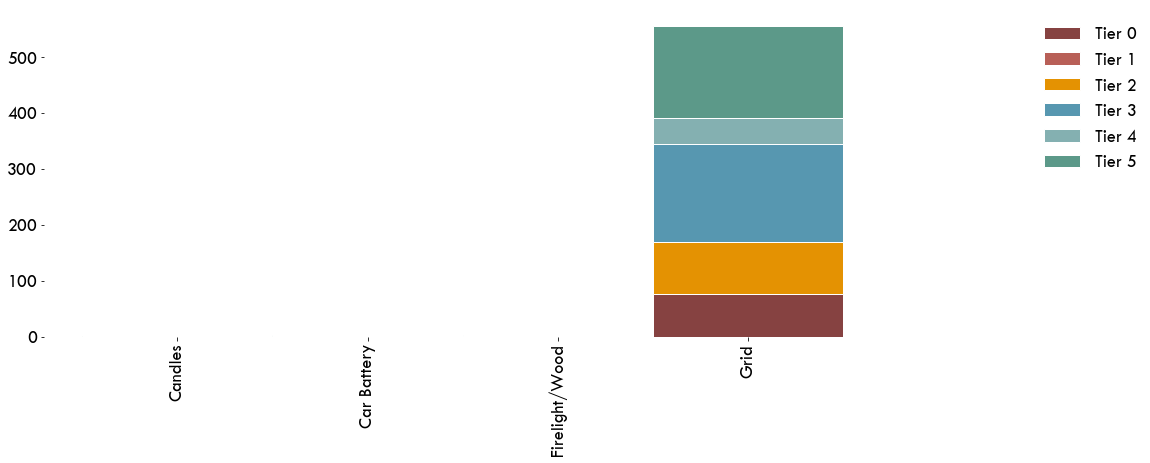

In [10]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
mfi.stacked_tier_per_category('E_Index',hedera.keys().powerSources,
                              'primary_electricity_source',
                              hedera.names('en').powerSources,legend=True)

## Access to Cooking Solutions

### Primary Cooking Fuels

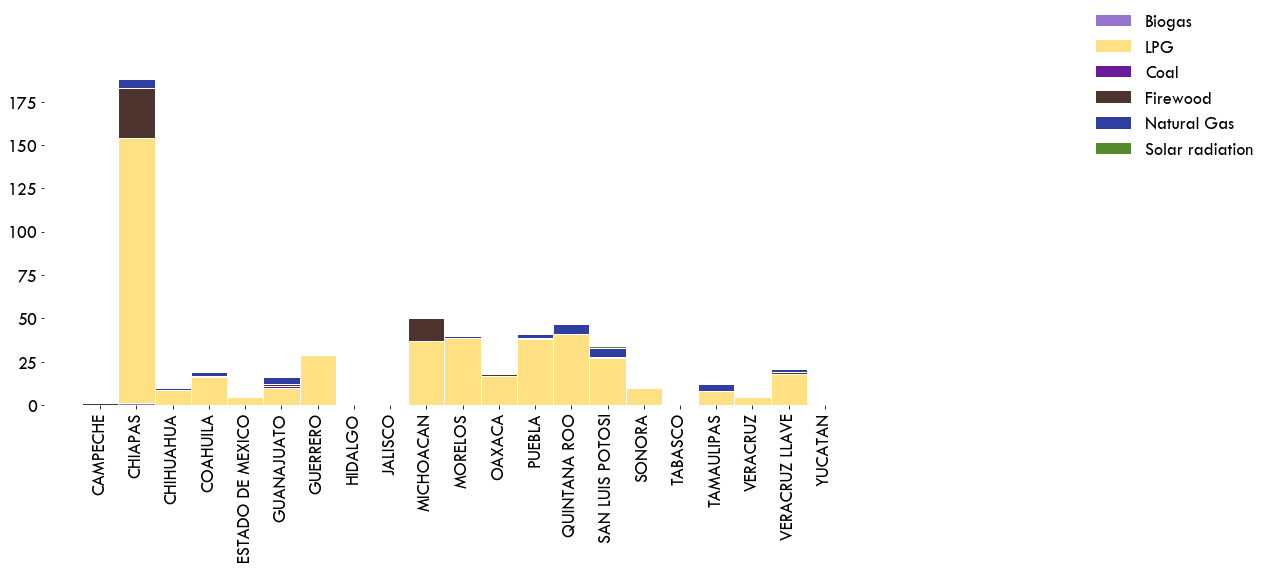

In [11]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
mfi.cooking_fuels_summary(legend=True)

### Attributed describing access to cooking solutions

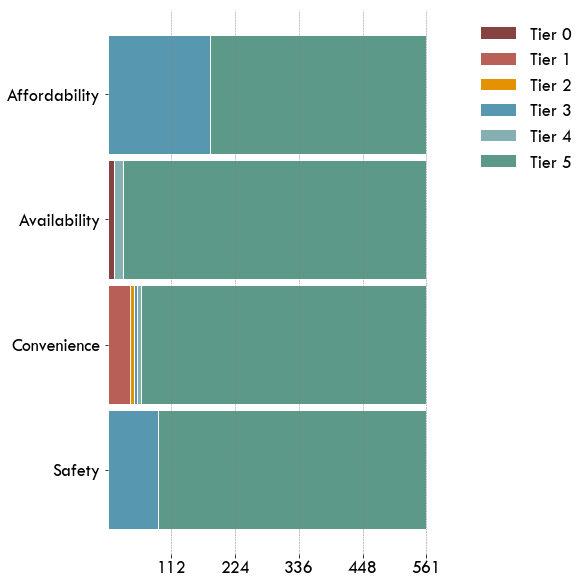

In [12]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
mfi.tier_barh(hedera.keys().attributes_cooking[0:4],hedera.names('en').c_attributes[0:4],legend=True)

### MTF Index (Cooking solutions)
The MTF Index, for each household, is given by the minimum ranking among all attributes

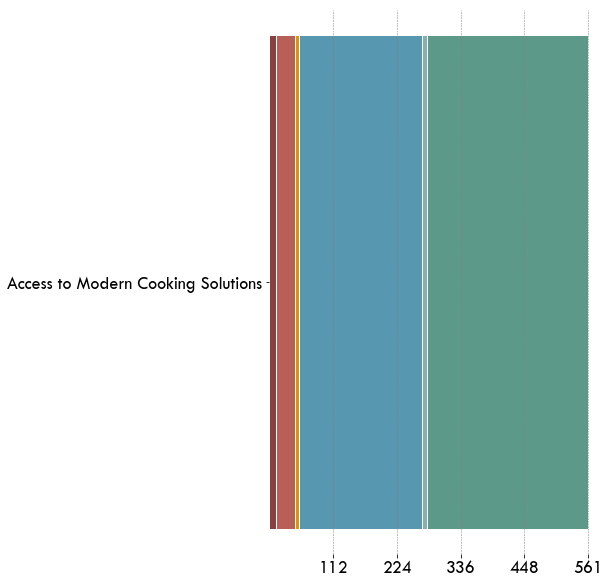

In [13]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
mfi.tier_barh(['C_Index'],['Access to Modern Cooking Solutions'])

### MTF Index (Access to Cooking Solutions) vs. Primary Cooking Fuel

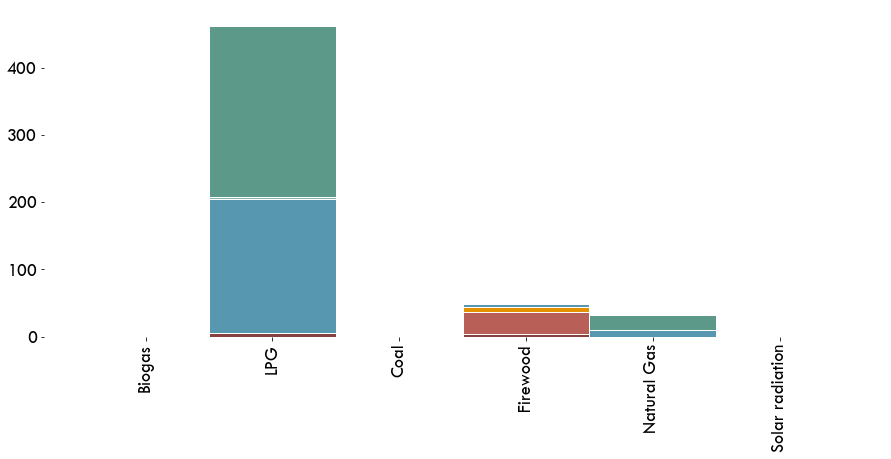

In [14]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
mfi.stacked_tier_per_category('C_Index',hedera.keys().fuels,
                              'primary_cooking_fuel',
                              hedera.names('en').fuels)